<a href="https://colab.research.google.com/github/matinkp/covid-19-x-rey-cnn/blob/main/x_rey_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download dataset from kaggle 
> Don't forget to downlaod your kaggle api key and upload it on your Gdrive.
>
> For this you can use this [link](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/) and follow step 2.

In [1]:
! pip install kaggle ; mkdir ~/.kaggle ; cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [2]:
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download khoongweihao/covid19-xray-dataset-train-test-sets

100% 84.0M/84.3M [00:01<00:00, 95.1MB/s]
100% 84.3M/84.3M [00:01<00:00, 87.0MB/s]


In [4]:
! unzip covid19-xray-dataset-train-test-sets.zip

Archive:  covid19-xray-dataset-train-test-sets.zip
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0058-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0059-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0072-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0073-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0092-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0105-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0110-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0111-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0112-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0117-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0120

## Import libraries
          

In [10]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [6]:
train_dir = "/content/xray_dataset_covid19/train"
test_dir = "/content/xray_dataset_covid19/test"

In [7]:
import pathlib
dataset_url = "/content/xray_dataset_covid19"
data_dir = pathlib.Path(dataset_url)
normal_example = list(data_dir.glob('train/NORMAL/*'))
pneumonia_example = list(data_dir.glob('train/PNEUMONIA/*'))

Text(0.5, 1.0, 'pneumonia case')

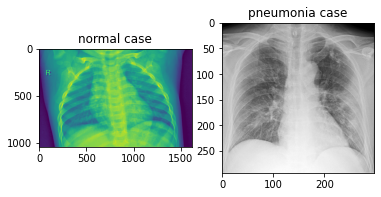

In [8]:
plt.subplot(1,2,1)
img1=plt.imread(normal_example[1])
plt.imshow(img1,filternorm=False)
plt.title("normal case")

plt.subplot(1,2,2)
img2=plt.imread(pneumonia_example[1])
plt.imshow(img2,filternorm=False)
plt.title("pneumonia case")


In [11]:
train_data_generator = ImageDataGenerator(rescale=1/255)
test_data_generator = ImageDataGenerator(rescale= 1/255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

test_generator = train_data_generator.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [25]:
model = tf.keras.Sequential([
  layers.Conv2D(64,(3,3), activation='relu',input_shape=(150,150,3)),
  layers.MaxPool2D(2,2),
  layers.Dropout(0.25),

  layers.Conv2D(128,(3,3), activation='relu'),
  layers.MaxPool2D(2,2),
  layers.Dropout(0.25),

  layers.Conv2D(64,(3,3), activation='relu'),
  layers.MaxPool2D(2,2),
  layers.Dropout(0.25),

  layers.Conv2D(64,(3,3), activation='relu'),
  layers.MaxPool2D(2,2),
  layers.Dropout(0.25),

  layers.Conv2D(32,(3,3), activation='relu'),
  layers.MaxPool2D(2,2),
  layers.Dropout(0.25),

  layers.Flatten(),

  layers.Dense(512,activation='relu'),
  layers.Dropout(0.25),

  layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

In [26]:
history= model.fit(train_generator,
                   epochs=30,
                   validation_data = test_generator )

Epoch 1/30
5/5 [==============================] - 19s 3s/step - loss: 0.7126 - accuracy: 0.4797 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 17s 3s/step - loss: 0.6922 - accuracy: 0.5135 - val_loss: 0.6915 - val_accuracy: 0.6000
Epoch 3/30
5/5 [==============================] - 17s 3s/step - loss: 0.6991 - accuracy: 0.4527 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 17s 3s/step - loss: 0.6929 - accuracy: 0.5135 - val_loss: 0.6921 - val_accuracy: 0.6000
Epoch 5/30
5/5 [==============================] - 17s 3s/step - loss: 0.6886 - accuracy: 0.5473 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 17s 3s/step - loss: 0.6839 - accuracy: 0.5743 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 17s 3s/step - loss: 0.6769 - accuracy: 0.5676 - val_loss: 0.6868 - val_accuracy: 0.6000
Epoch 8/30
5/5 [==================

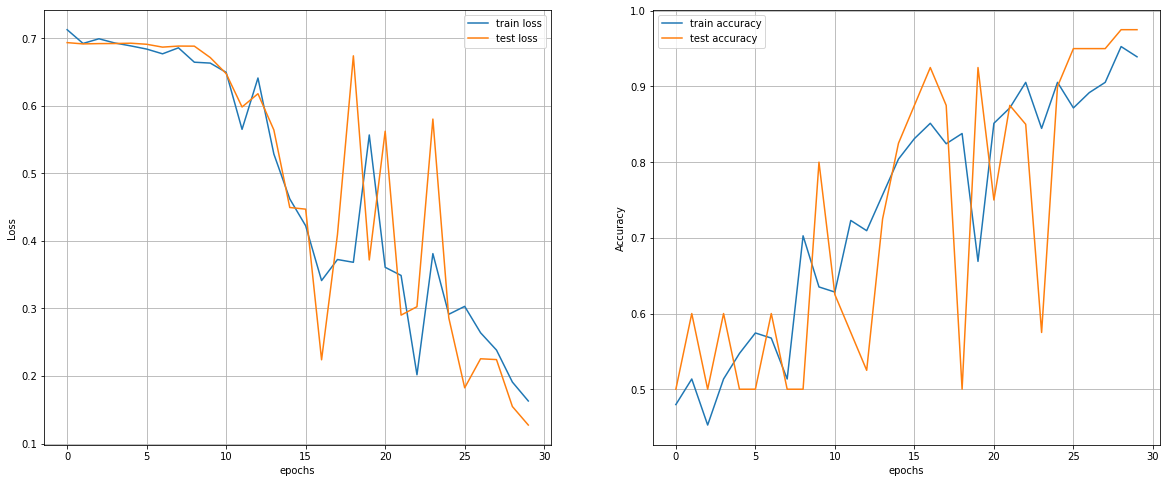

In [27]:
plt.figure(1,figsize=(20,8))
plt.subplot(1,2,1)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.grid(True)
plt.legend()

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 64)       